In [1]:
#Importando as Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
#Análise exploratória

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')
print(df.columns)
print(df.head())
print(df.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

In [5]:
#Criando novas variáveis

In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch']
def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 10:
        return '0s'
    elif age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    else:
        return '70+'

df['AgeGroup'] = df['Age'].apply(categorize_age)
order = ['Unknown', '0s', '10s', '20s', '30s', '40s', '50s', '60s', '70+']

In [7]:
#Visualizações

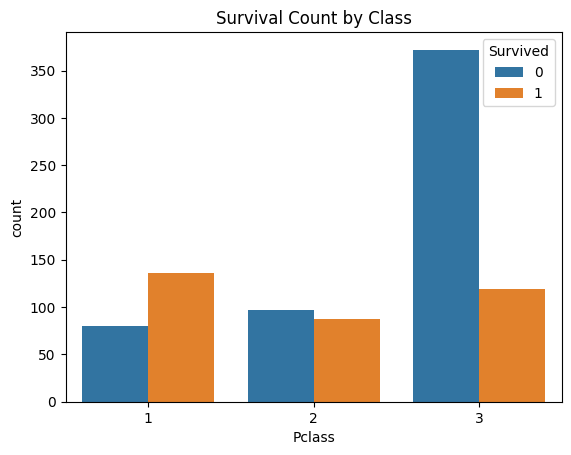

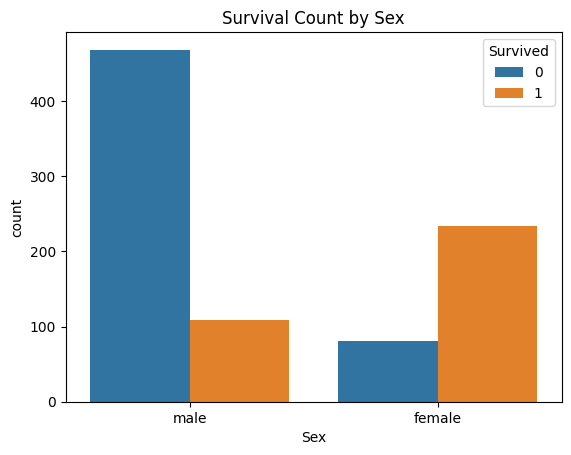

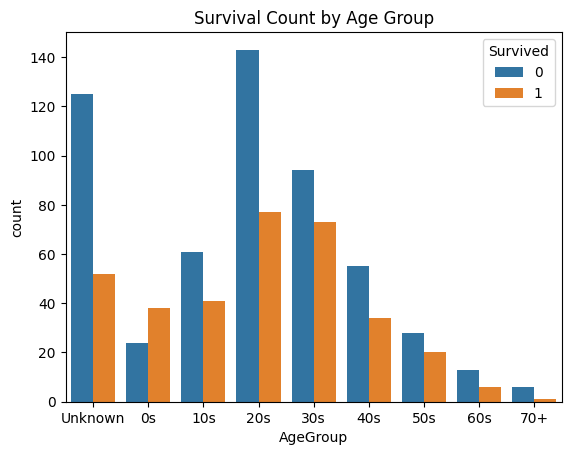

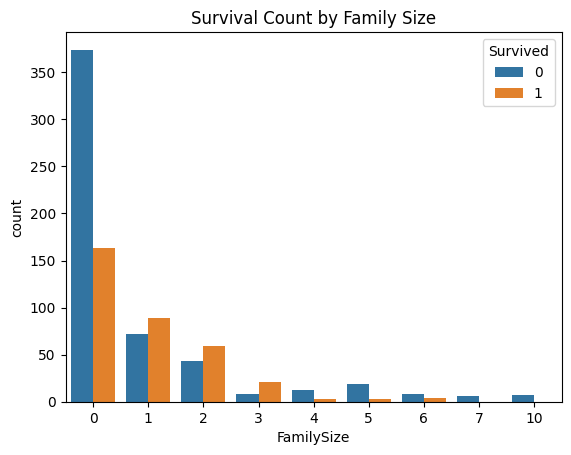

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.show()

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

sns.countplot(data=df, x='AgeGroup', hue='Survived', order=order)
plt.title('Survival Count by Age Group')
plt.show()

sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival Count by Family Size')
plt.show()

In [9]:
#Tratando dados nulos

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
AgeGroup         0
dtype: int64


In [11]:
#Transformando string em int

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [13]:
#Separando Colunas que serão utilizadas pelos modelos

In [14]:
X = df[['Pclass', 'Age', 'Sex', 'FamilySize', 'Fare']]
y = df['Survived']

In [15]:
#Heatmap para mostrar a correlação entre as variáveis

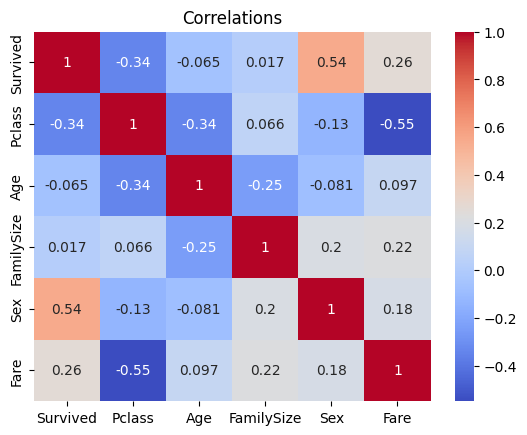

In [16]:
plt.title('Correlations')
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'FamilySize', 'Sex', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
#Reescalando as variáveis para evitar influência desproporcional pelos valores

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#Separando o dataset entre treino e teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=9)

In [21]:
#Aplicando o modelo de Regressão lógica

In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [24]:
#Aplicando o modelo de Random Forest

In [25]:
rf_model = RandomForestClassifier(random_state=9)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [27]:
#Testando a precisão da Regressão lógica

In [28]:
accuracy = accuracy_score(y_test, predictions)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


Accuracy: 75.98%


In [29]:
#Testando a precisão da Random Forest

In [30]:
rf_acc = accuracy_score(y_test, rf_preds)
print(f'\nRandom Forest Accuracy: {rf_acc * 100:.2f}%')


Random Forest Accuracy: 78.21%


In [31]:
#Matrix de confusão

In [32]:
print("\n:Confusion Matrix")
print(confusion_matrix(y_test, predictions))


:Confusion Matrix
[[85 15]
 [28 51]]


In [33]:
#Relatório de classificação

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.77      0.65      0.70        79

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

